In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
import pickle


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_excel(r"C:\Users\Admin\Downloads\customer_retention_dataset (2).xlsx")

data.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?,10 What is the operating system (OS) of your device?,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [6]:
data.shape

(269, 71)

In [7]:
#dropped duplicates 

data.drop_duplicates(inplace=True)

In [8]:
data.shape

(139, 71)

In [4]:
data.rename(columns={'1Gender of respondent':'gender','2 How old are you? ':'age_group','3 Which city do you shop online from?':'city',
                   '4 What is the Pin Code of where you shop online from?':'pincode','5 Since How Long You are Shopping Online ?':'Years_of_shopping',
                    '6 How many times you have made an online purchase in the past 1 year?':'purchase_last_year', '7 How do you access the internet while shopping on-line?':'interner_mode',
                    '8 Which device do you use to access the online shopping?':'device_used','9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ':'device_size',
                    '10 What is the operating system (OS) of your device?\t\t\t\t                                          ':'Os_system',
                      '11 What browser do you run on your device to access the website?\t\t\t                                                          ':'browser',
                    '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ':'channel_used',
                      '13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   ':'mode_used',
                     '14 How much time do you explore the e- retail store before making a purchase decision?                                                                   ':'time_spent',
                     '15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               ':'preferred_payment_option',
                     '16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'dropping_shopping','17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       ':'reason_for_dropping'

                    },inplace=True)

In [5]:
data.head()

,gender,age_group,city,pincode,Years_of_shopping,purchase_last_year,interner_mode,device_used,device_size,Os_system,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


# gender graph

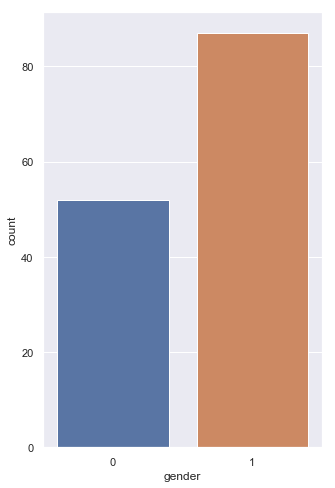

1    87
0    52
Name: gender, dtype: int64

In [11]:
sns.set()
plt.figure(figsize=(5,8))
sns.countplot('gender',data=data)
plt.show()

data.gender.value_counts()

# AGE GROUP GRAPH

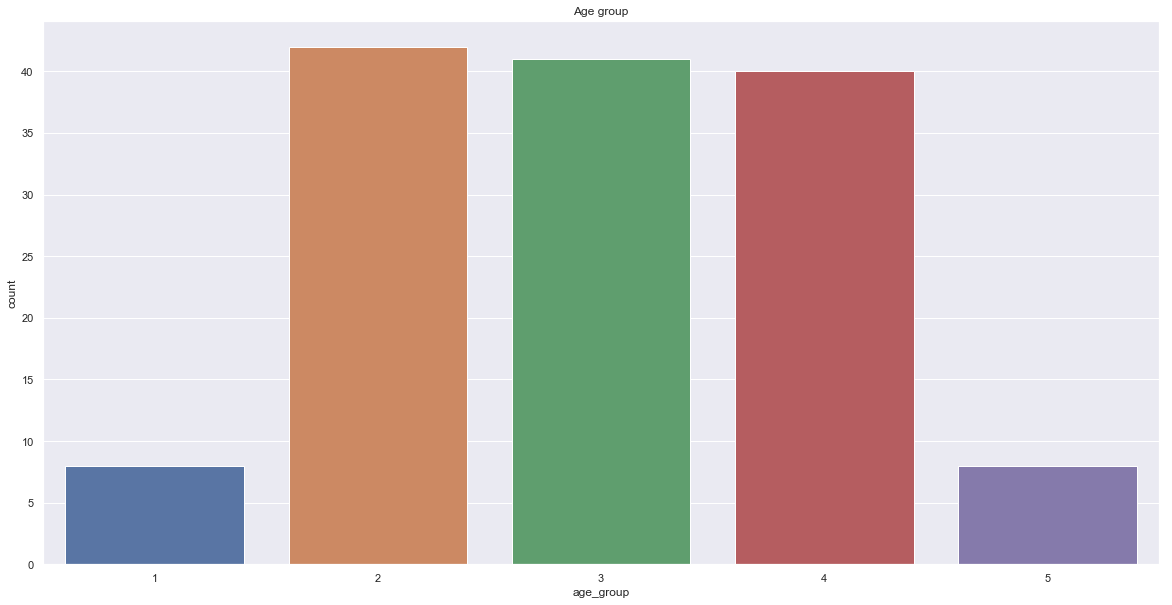

2    42
3    41
4    40
5     8
1     8
Name: age_group, dtype: int64

In [12]:
sns.set()
plt.figure(figsize=(20,10))
sns.countplot('age_group',data=data)
plt.title('Age group')
plt.show()



data.age_group.value_counts()

# CITY GRAPH

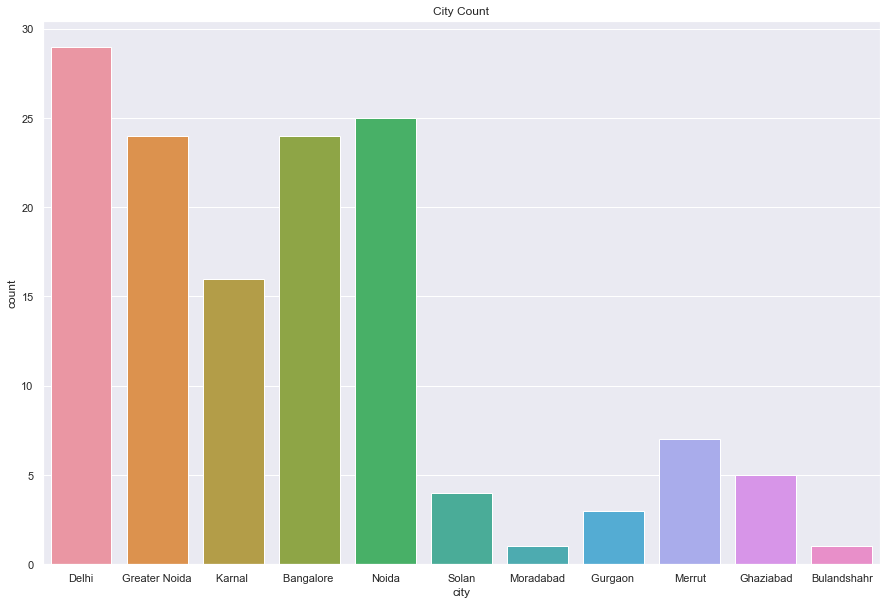

In [13]:
sns.set()
plt.figure(figsize=(15,10))
sns.countplot('city',data=data)
plt.title('City Count')
plt.show()

# PINCODE GRAPH

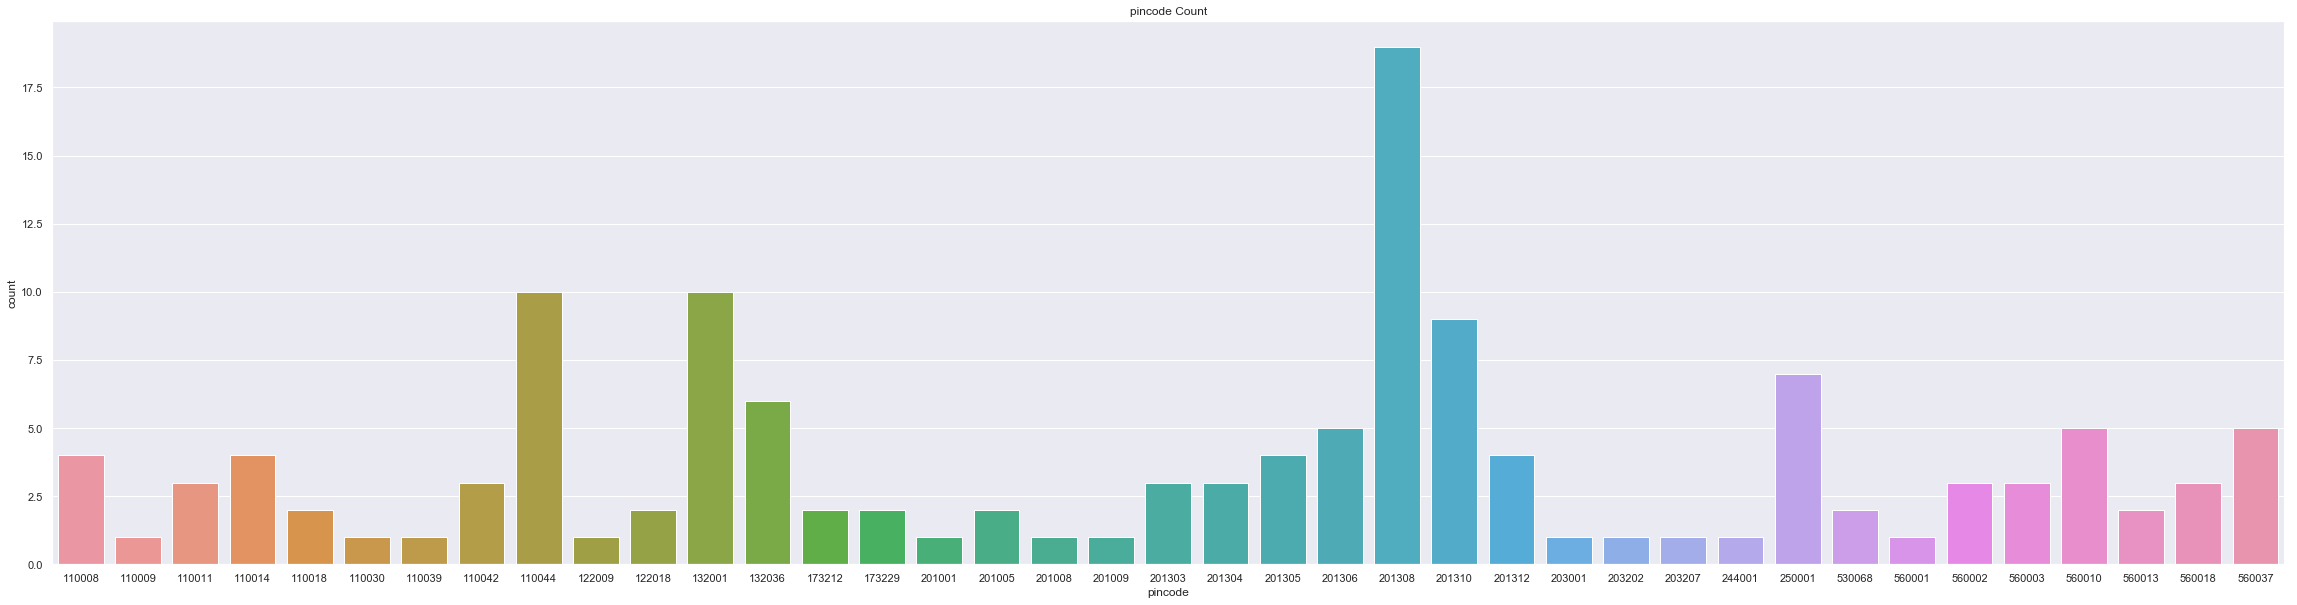

201308    19
110044    10
132001    10
201310     9
250001     7
132036     6
201306     5
560010     5
560037     5
201312     4
201305     4
110014     4
110008     4
201304     3
201303     3
110011     3
560003     3
560002     3
110042     3
560018     3
560013     2
530068     2
173212     2
173229     2
110018     2
201005     2
122018     2
201009     1
201008     1
201001     1
203001     1
560001     1
203202     1
122009     1
110009     1
203207     1
110030     1
110039     1
244001     1
Name: pincode, dtype: int64

In [14]:
sns.set()
plt.figure(figsize=(40,10))
sns.countplot('pincode',data=data)
plt.title('pincode Count')
plt.show()

data.pincode.value_counts()

# Since How Long You are Shopping Online ?

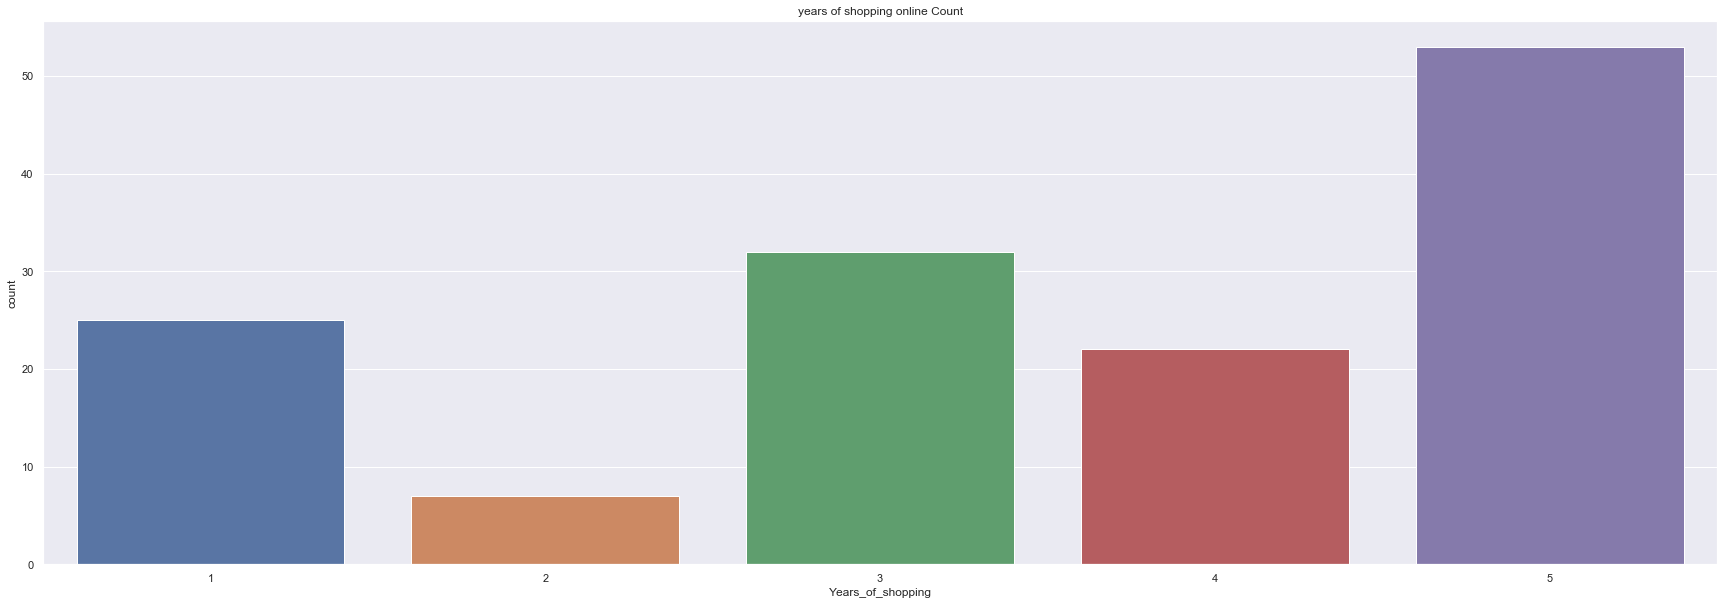

5    53
3    32
1    25
4    22
2     7
Name: Years_of_shopping, dtype: int64

In [15]:
sns.set()
plt.figure(figsize=(30,10))
sns.countplot('Years_of_shopping',data=data)
plt.title('years of shopping online Count')
plt.show()


data.Years_of_shopping.value_counts()

# How many times you have made an online purchase in the past 1 year?


less than 10 times -1
10-20 times- 2
21-30 times- 3
31-40 times- 4
41 and above -5

#the graph show sthe relation b/w the the years for shopping and shopping done last year.
#It cleary shows that the customers who have shopping above 5yrs have done maximum purchase last year as well.

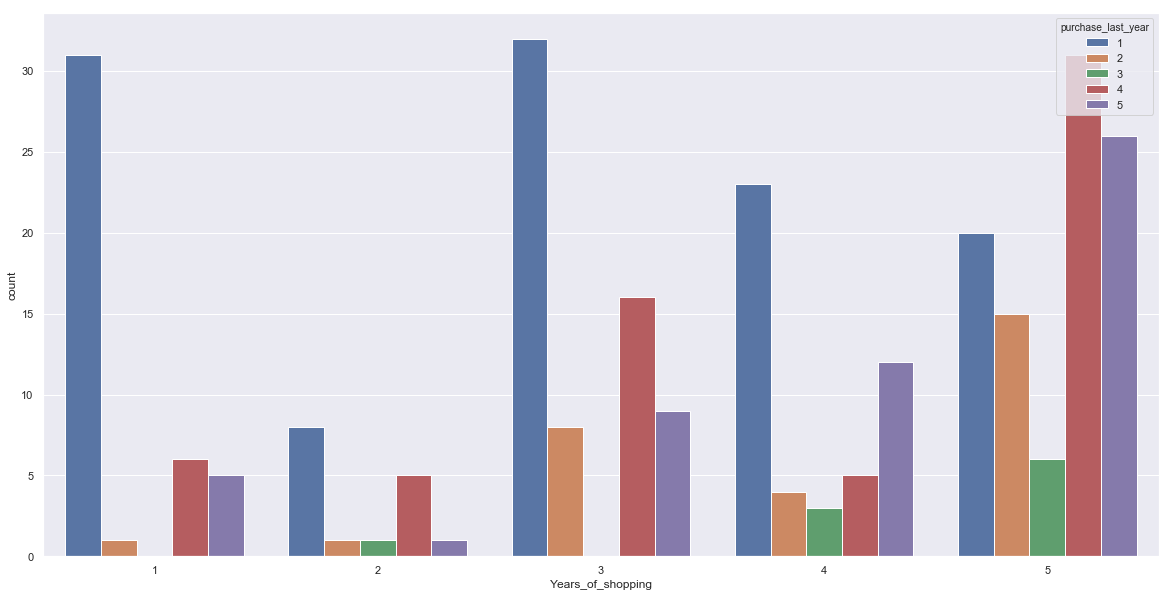

1    114
4     63
5     53
2     29
3     10
Name: purchase_last_year, dtype: int64

In [9]:
sns.set()
plt.figure(figsize=(20,10))
sns.countplot('Years_of_shopping',hue='purchase_last_year',data=data)

plt.show()


data.purchase_last_year.value_counts()

# How do you access the internet while shopping on-linE

Mobile inteernet is the most frequently used internet mode for shopping due to it convenienece

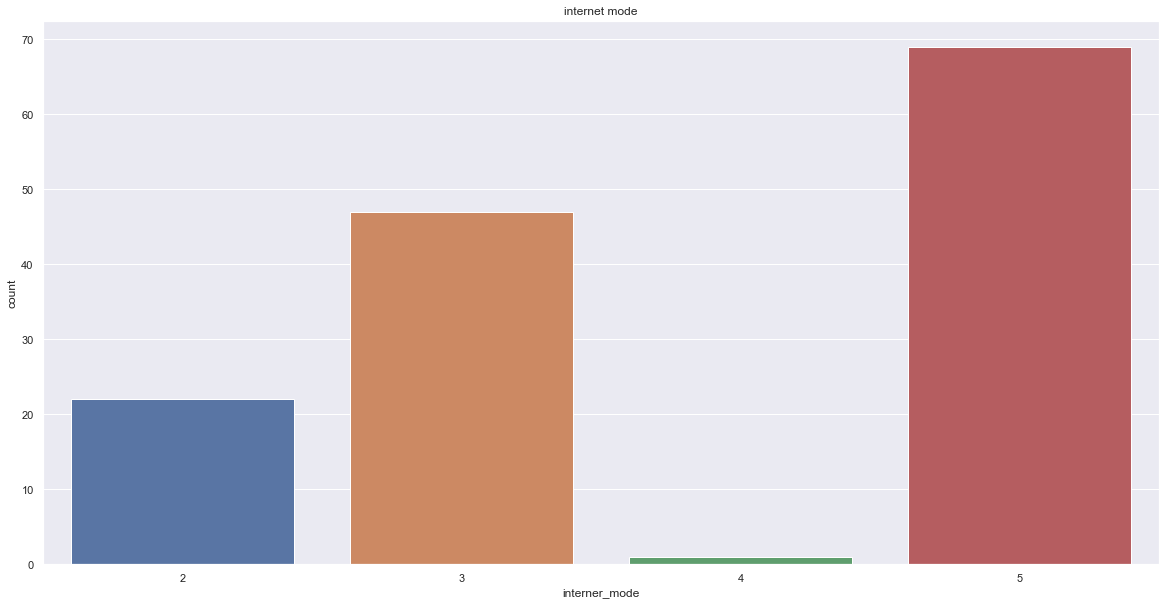

5    69
3    47
2    22
4     1
Name: interner_mode, dtype: int64

In [17]:
sns.set()
plt.figure(figsize=(20,10))
sns.countplot('interner_mode',data=data)
plt.title('internet mode')
plt.show()


data.interner_mode.value_counts()

# What is the operating system (OS) of your device?

1-windows/mobile windows
2- android
3-ios

window/mobile windows is the most used operating sysytem while mac/ios are the least as ios is not available with everyone

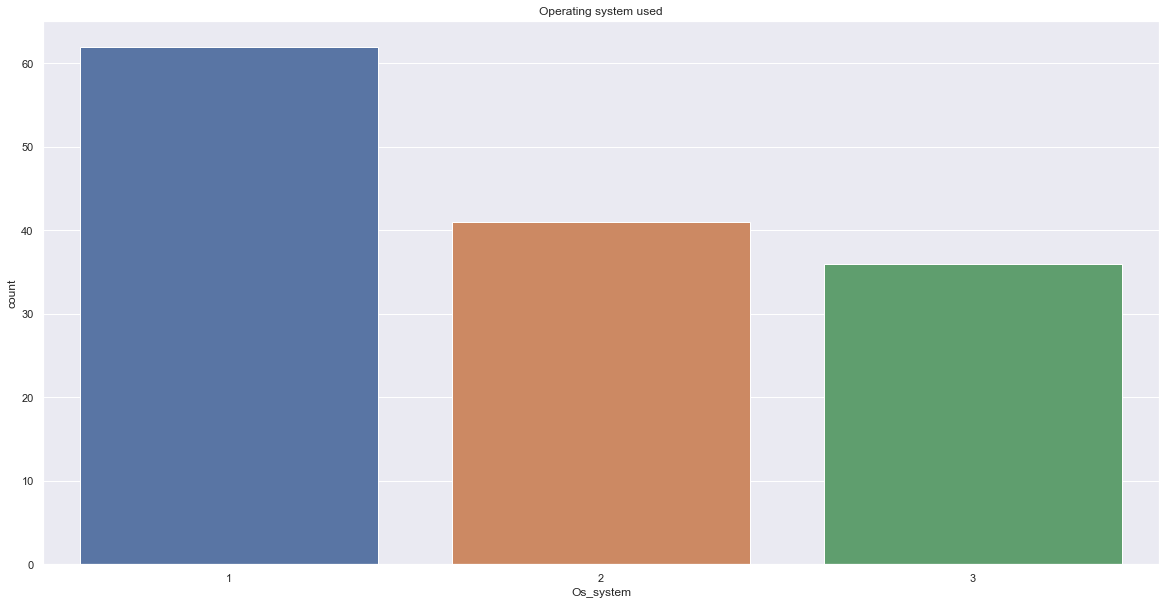

1    62
2    41
3    36
Name: Os_system, dtype: int64

In [19]:
sns.set()
plt.figure(figsize=(20,10))
sns.countplot('Os_system',data=data)
plt.title('Operating system used')
plt.show()



data.Os_system.value_counts()

# What browser do you run on your device to access the website?	

Google Chrome (1) is the most used browser follwed by Safari (2)

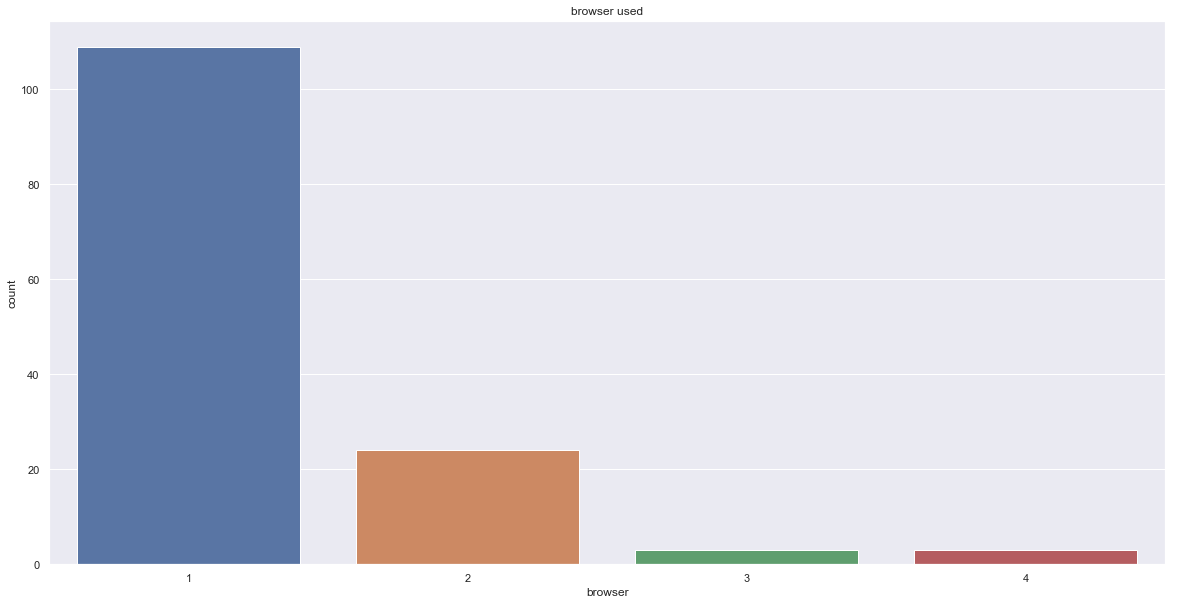

1    109
2     24
4      3
3      3
Name: browser, dtype: int64

In [20]:
sns.set()
plt.figure(figsize=(20,10))
sns.countplot('browser',data=data)
plt.title('browser used')
plt.show()


data.browser.value_counts()

# Which channel did you follow to arrive at your favorite online store for the first time?         

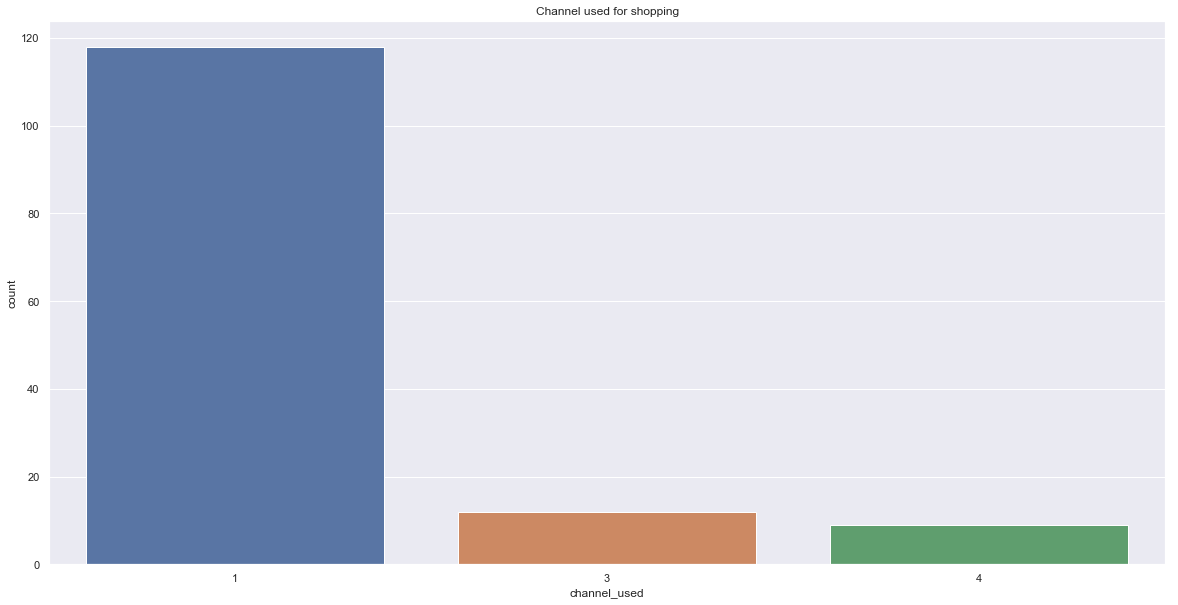

1    118
3     12
4      9
Name: channel_used, dtype: int64

In [21]:
sns.set()
plt.figure(figsize=(20,10))
sns.countplot('channel_used',data=data)
plt.title('Channel used for shopping')
plt.show()


data.channel_used.value_counts()

# After first visit, how do you reach the online retail store?				            

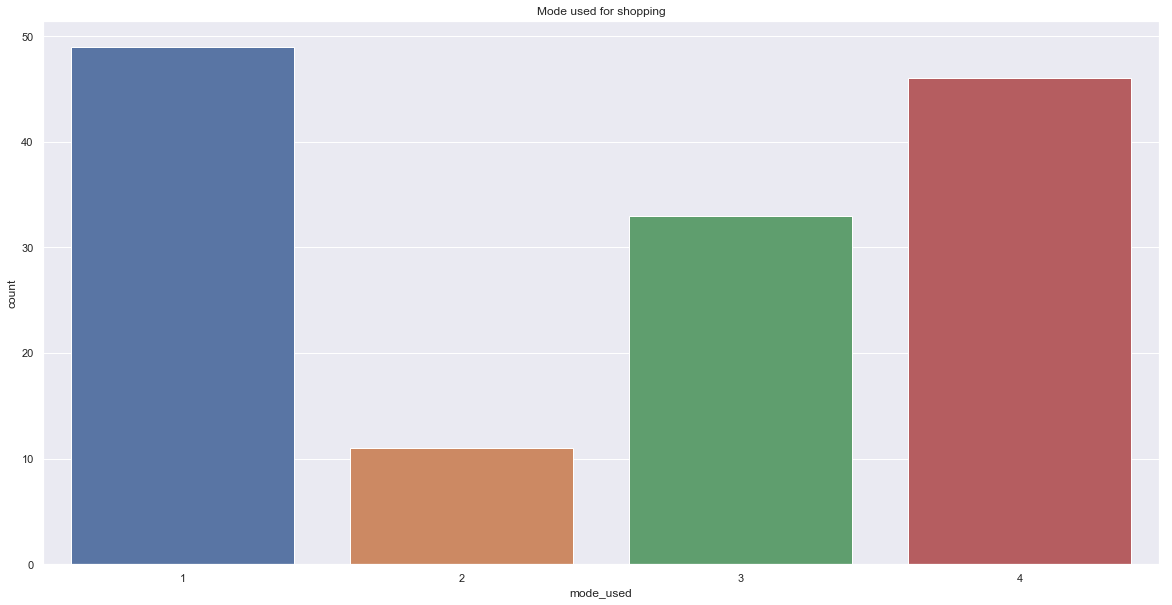

1    49
4    46
3    33
2    11
Name: mode_used, dtype: int64

In [22]:
sns.set()
plt.figure(figsize=(20,10))
sns.countplot('mode_used',data=data)
plt.title('Mode used for shopping')
plt.show()


data.mode_used.value_counts()

# How much time do you explore the e- retail store before making a purchase decision?       

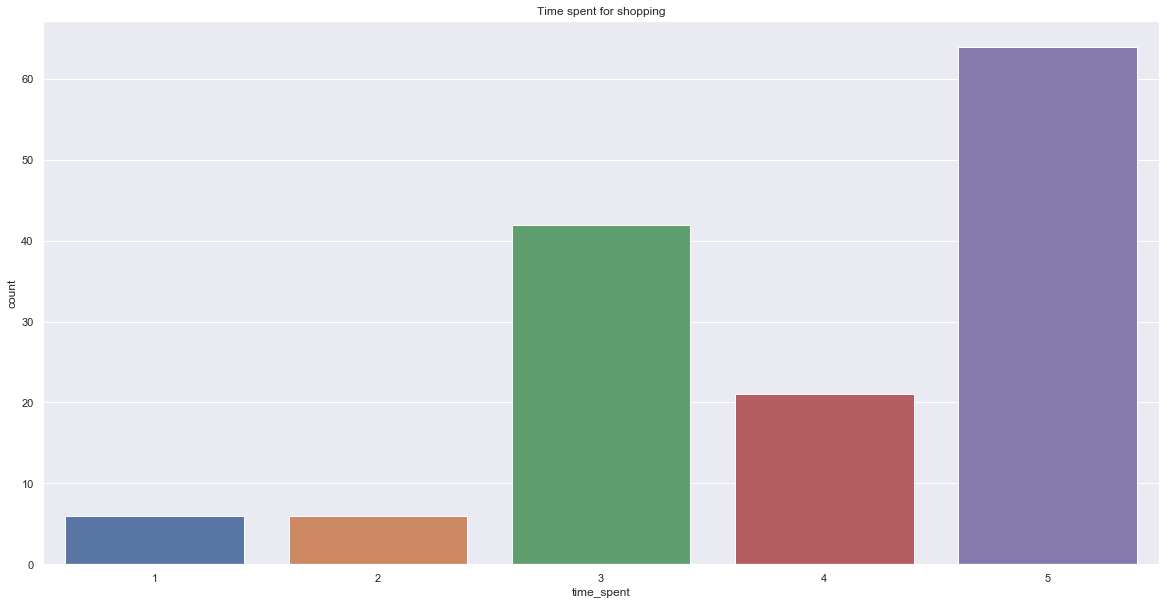

5    64
3    42
4    21
2     6
1     6
Name: time_spent, dtype: int64

In [23]:
sns.set()
plt.figure(figsize=(20,10))
sns.countplot('time_spent',data=data)
plt.title('Time spent for shopping')
plt.show()


data.time_spent.value_counts()

# What is your preferred payment Option?			

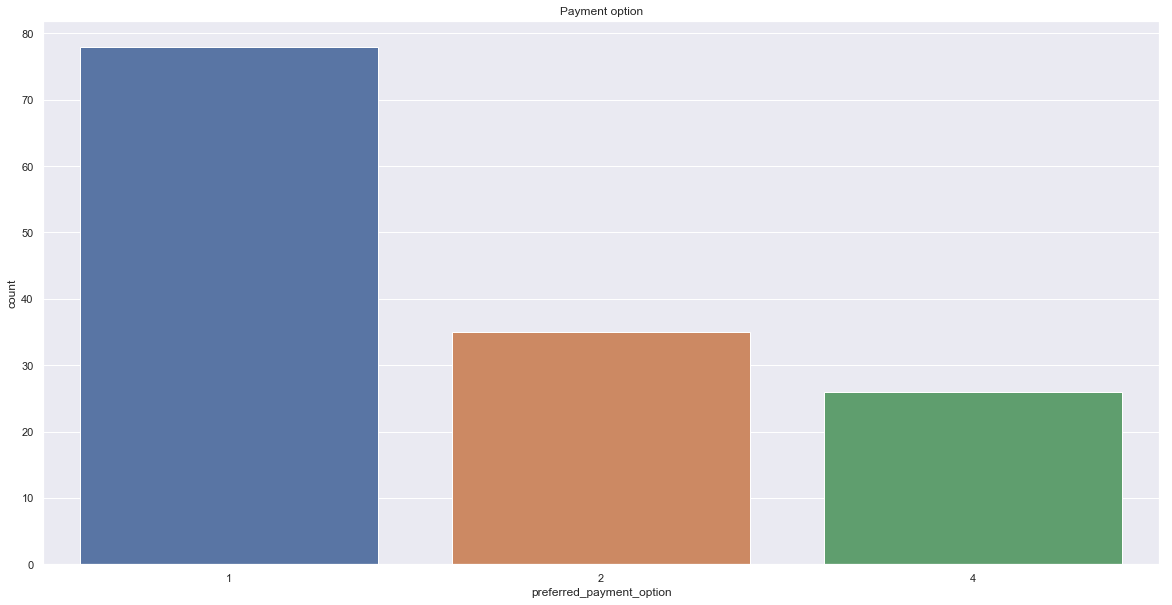

1    78
2    35
4    26
Name: preferred_payment_option, dtype: int64

In [24]:
sns.set()
plt.figure(figsize=(20,10))
sns.countplot('preferred_payment_option',data=data)
plt.title('Payment option')
plt.show()



data.preferred_payment_option.value_counts()

# Why did you abandon the “Bag”, “Shopping Cart”?					            

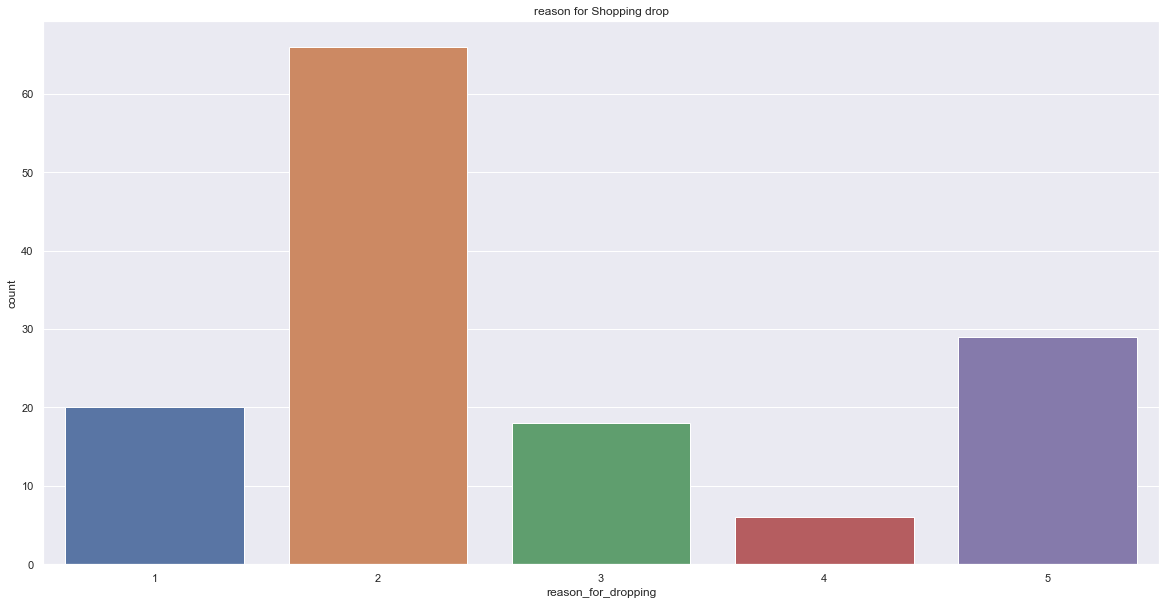

2    66
5    29
1    20
3    18
4     6
Name: reason_for_dropping, dtype: int64

In [25]:
sns.set()
plt.figure(figsize=(20,10))
sns.countplot('reason_for_dropping',data=data)
plt.title('reason for Shopping drop')
plt.show()


data.reason_for_dropping.value_counts()

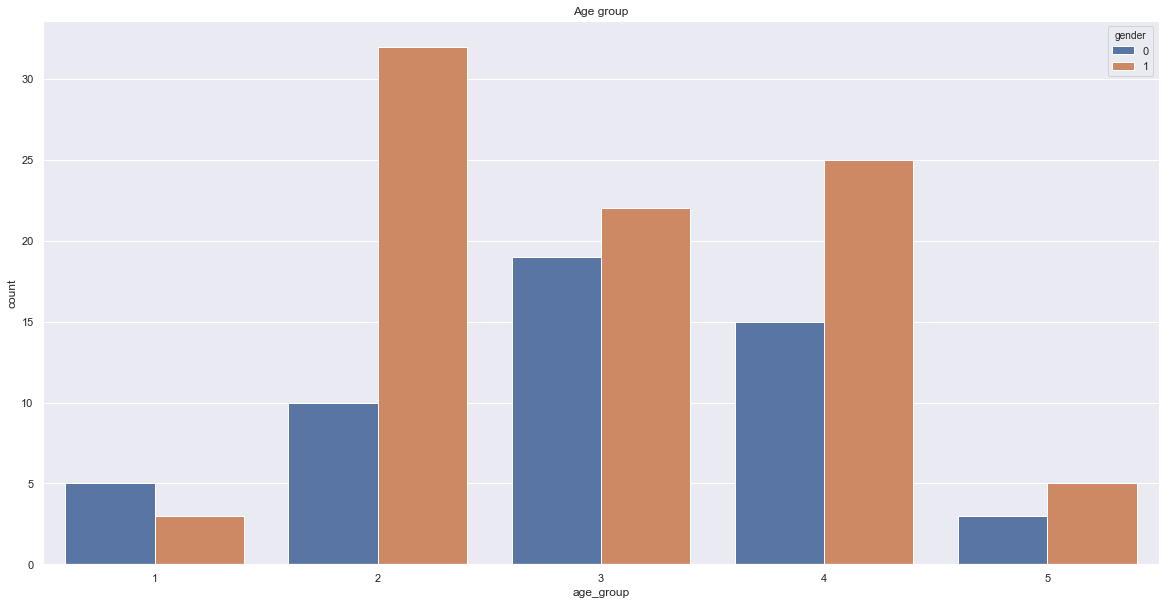

2    42
3    41
4    40
5     8
1     8
Name: age_group, dtype: int64

In [26]:
sns.set()
plt.figure(figsize=(20,10))
sns.countplot('age_group',hue='gender',data=data)
plt.title('Age group')
plt.show()



data.age_group.value_counts()

# AGE GROUP AND GENDER

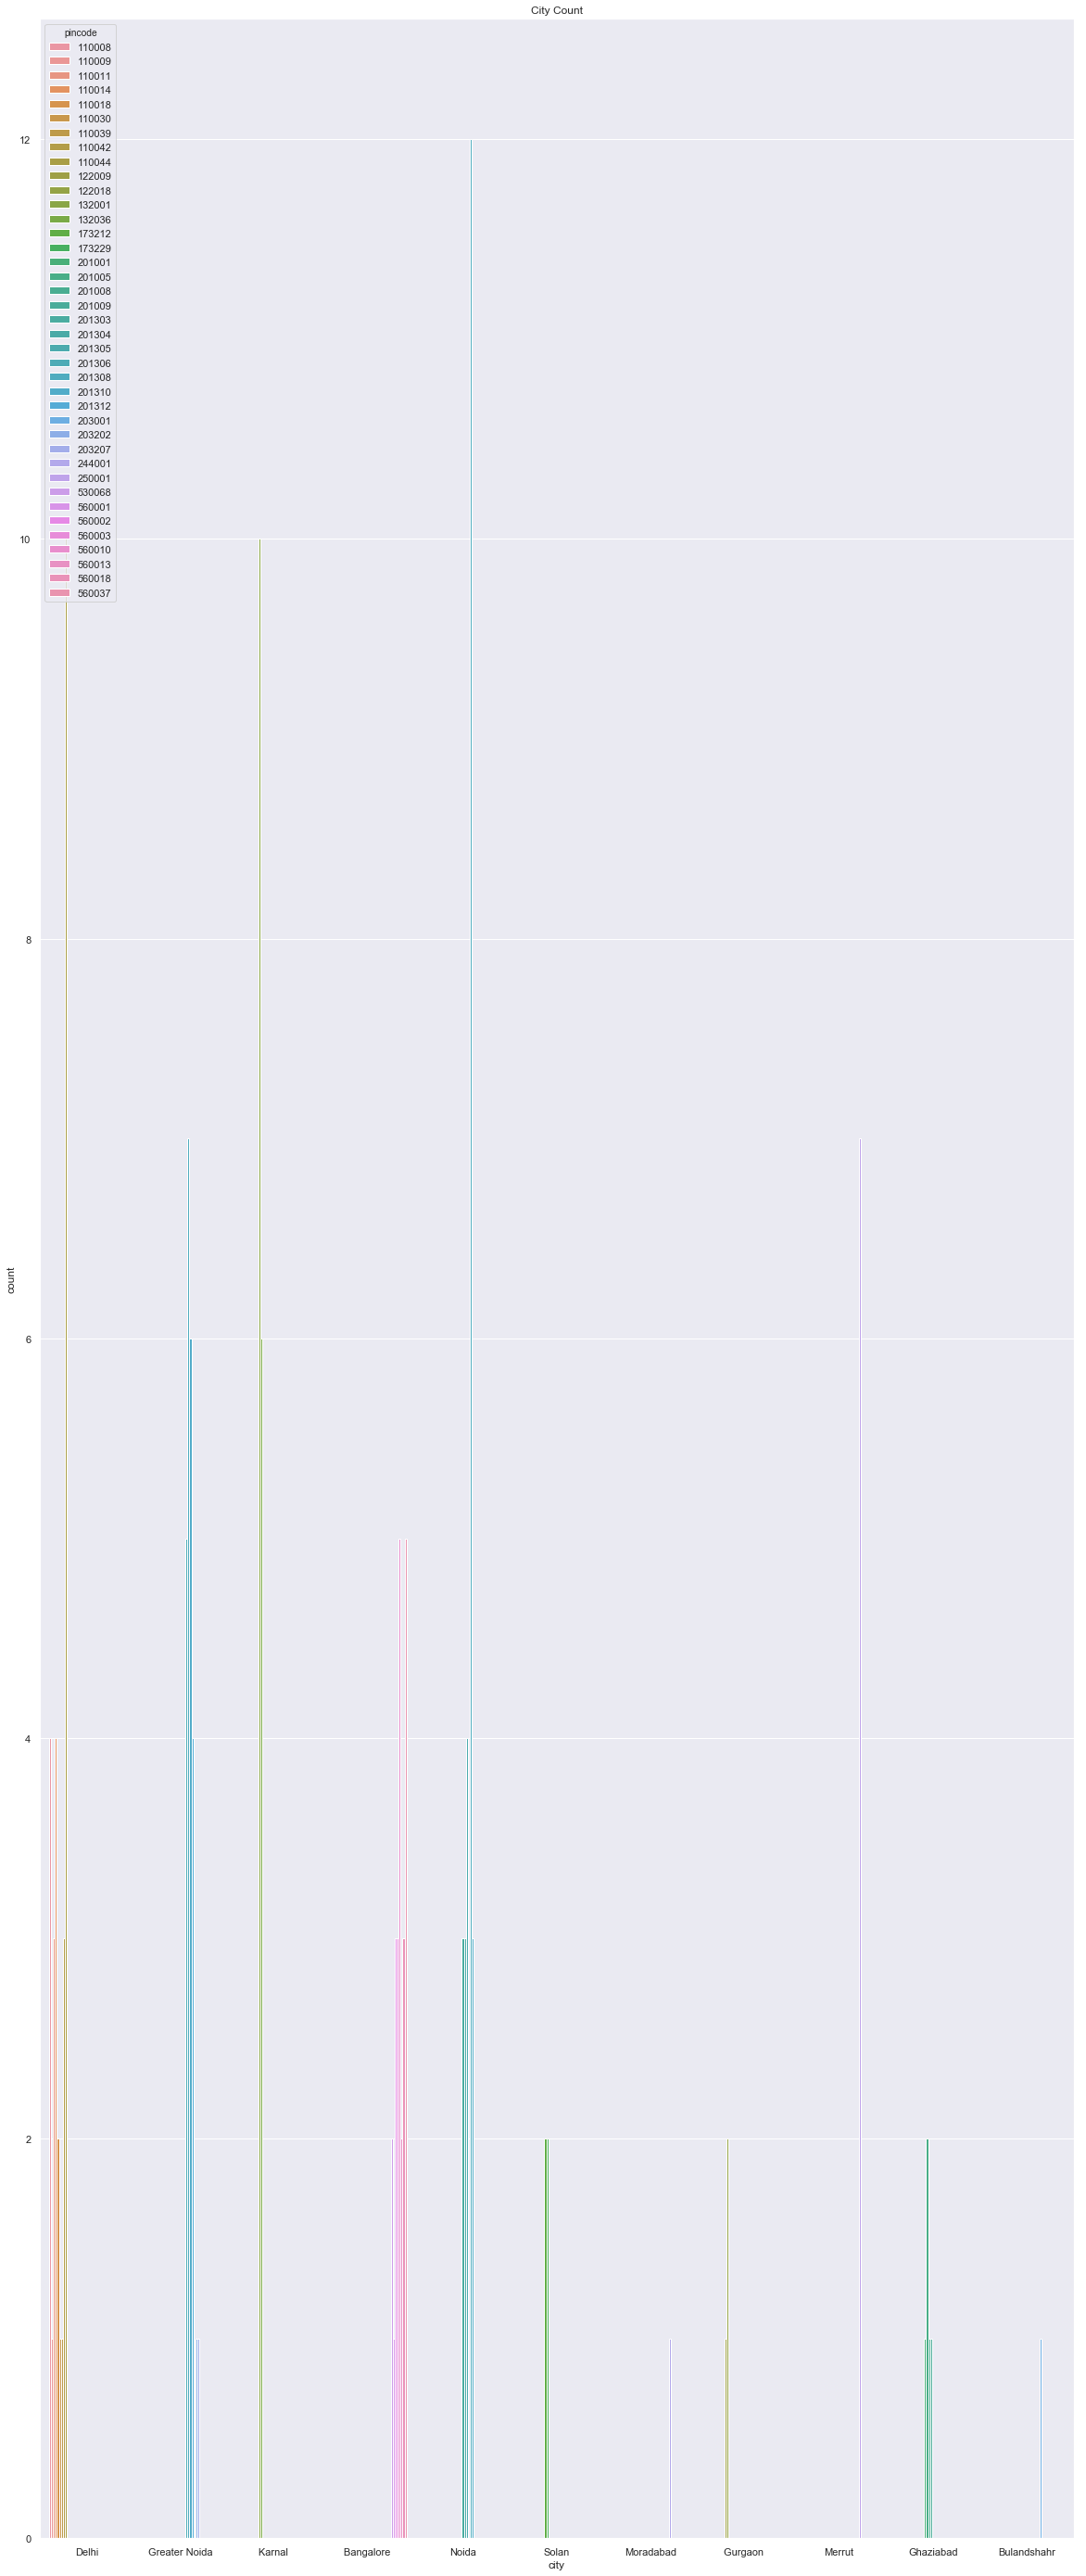

In [27]:
sns.set()
plt.figure(figsize=(20,50))
sns.countplot('city',hue='pincode',data=data)
plt.title('City Count')
plt.show()


In [28]:
data.columns

Index(['gender', 'age_group', 'city', 'pincode', 'Years_of_shopping',
       'purchase_last_year', 'interner_mode', 'device_used', 'device_size',
       'Os_system', 'browser', 'channel_used', 'mode_used', 'time_spent',
       'preferred_payment_option',
       '16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ',
       'reason_for_dropping',
       '18 The content on the website must be easy to read and understand',
       '19 Information on similar product to the one highlighted  is important for product comparison',
       '20 Complete information on listed seller and product being offered is important for purchase decision.',
       '21 All relevant information on listed products must be stated clearly',
       '22 Ease of navigation in website', '23 Loading and processing speed',
       '24 User friendly Interface of the website',
       '25 Convenient Payment methods

In [29]:
data.rename(columns={'18 The content on the website must be easy to read and understand':'easy_to_read_content',
       '19 Information on similar product to the one highlighted  is important for product comparison':'Highlighted_info',
       '20 Complete information on listed seller and product being offered is important for purchase decision.':'seller_info',
       '21 All relevant information on listed products must be stated clearly':'clarity_of_information',
       '22 Ease of navigation in website':'easy_navigation', '23 Loading and processing speed':'Processing_speed',
       '24 User friendly Interface of the website':'user_friendly_interface',
       '25 Convenient Payment methods':'payment_convenience',
       '26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time':'trust_on delivery_time',
       '27 Empathy (readiness to assist with queries) towards the customers':'customer_friendly',
       '28 Being able to guarantee the privacy of the customer':'Cutsomer_privacy',
       '29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)':'modes_of_communication',
       '30 Online shopping gives monetary benefit and discounts':'discounts&offers',
       '31 Enjoyment is derived from shopping online':'enjoyment_in_shopping',
       '32 Shopping online is convenient and flexible':'flexiblity',
       '33 Return and replacement policy of the e-tailer is important for purchase decision':'return_replacement_policy',
       '34 Gaining access to loyalty programs is a benefit of shopping online':'loyality_points',
       '35 Displaying quality Information on the website improves satisfaction of customers':'quality_info',
       '36 User derive satisfaction while shopping on a good quality website or application':'shopping_friendly_website',
       '37 Net Benefit derived from shopping online can lead to users satisfaction':'benefits',
       '38 User satisfaction cannot exist without trust':'trust',
       '39 Offering a wide variety of listed product in several category':'variety_of_products',
       '40 Provision of complete and relevant product information':'relevant_product_info',
       '41 Monetary savings':'savings',
       '42 The Convenience of patronizing the online retailer':'convenience',
       '43 Shopping on the website gives you the sense of adventure':'adventure_of_shopping',
       '44 Shopping on your preferred e-tailer enhances your social status':'listed_e-retailers',
       '45 You feel gratification shopping on your favorite e-tailer':'gratification',
       '46 Shopping on the website helps you fulfill certain roles':'fulfilling_roles',
       '47 Getting value for money spent':'value_for_money_spent','16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   ':'drop_shopping'
                    },inplace=True)

In [31]:
data.drop(data.iloc[:, 47:], inplace=True, axis=1)

# The content on the website must be easy to read and understand

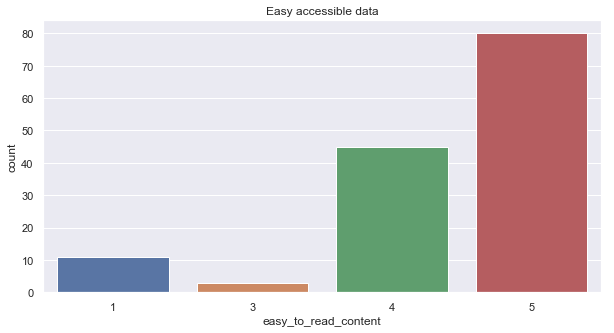

In [63]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('easy_to_read_content',data=data)
plt.title('Easy accessible data')
plt.show()

# Information on similar product to the one highlighted  is important for product comparison and seller-info

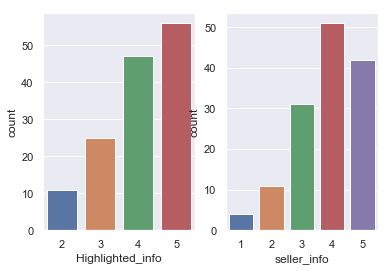

In [52]:
plt.subplot(1,2,1)
sns.countplot('Highlighted_info',data=data)


plt.subplot(1,2,2)
sns.countplot('seller_info',data=data)

# All relevant information on listed products must be stated clearly

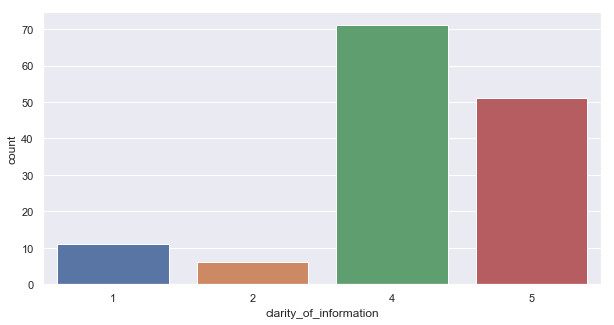

In [64]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('clarity_of_information',data=data)

plt.show()

# Ease of navigation in website

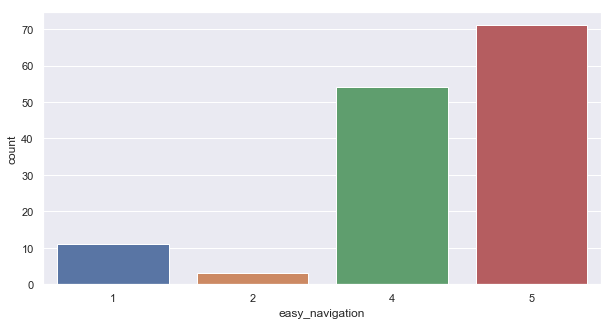

In [65]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('easy_navigation',data=data)

plt.show()

# Loading and processing speed

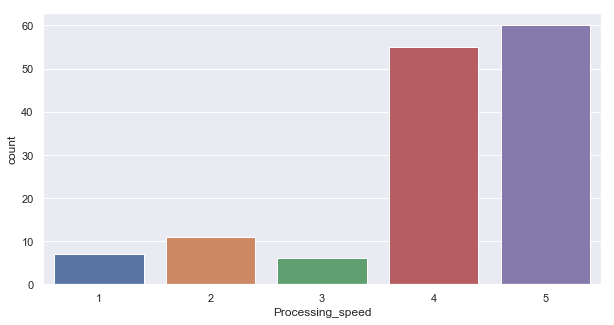

In [66]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('Processing_speed',data=data)

plt.show()

# User friendly Interface of the website

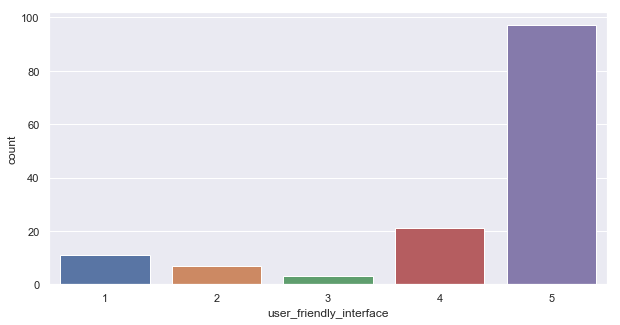

In [68]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('user_friendly_interface',data=data)

plt.show()

# Convenient Payment methods

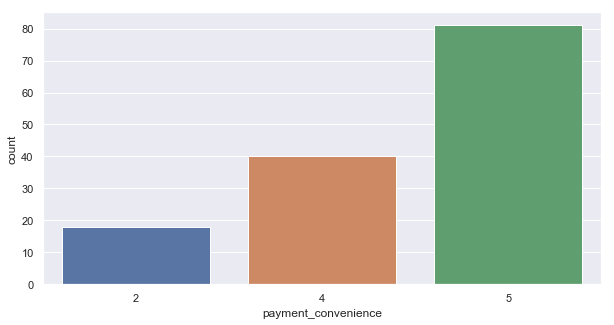

In [69]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('payment_convenience',data=data)

plt.show()

# trust that the online retail store will fulfill its  delivery on time

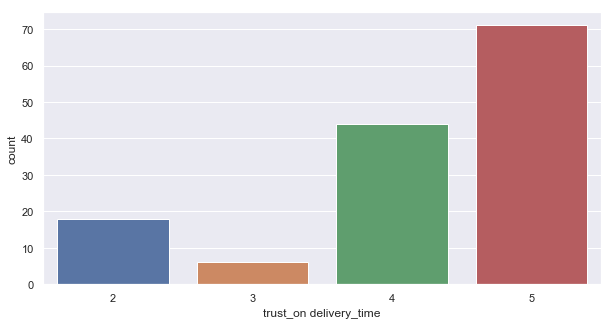

In [71]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot( 'trust_on delivery_time',data=data)

plt.show()

# Empathy (readiness to assist with queries) 

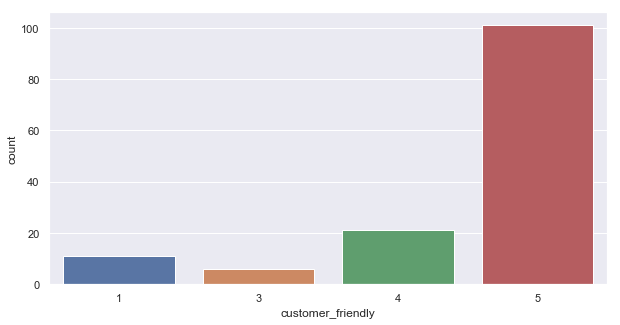

In [74]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('customer_friendly',data=data)

plt.show()


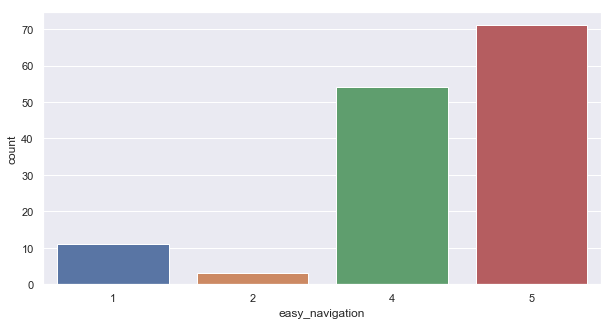

In [65]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('easy_navigation',data=data)

plt.show()

# Being able to guarantee the privacy of the customer

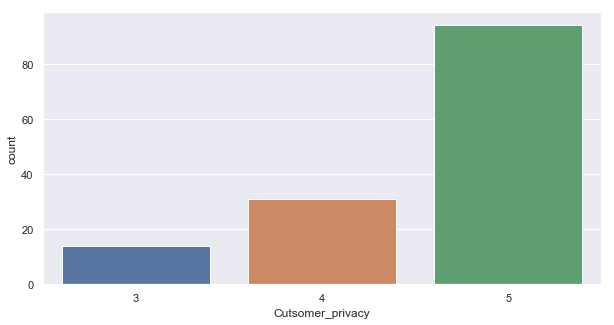

5    94
4    31
3    14
Name: Cutsomer_privacy, dtype: int64

In [76]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('Cutsomer_privacy',data=data)

plt.show()

data.Cutsomer_privacy.value_counts()

# Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)

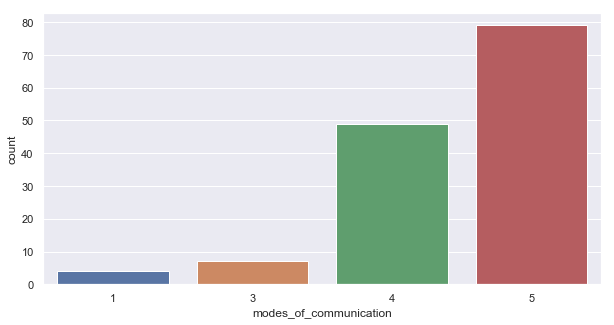

5    79
4    49
3     7
1     4
Name: modes_of_communication, dtype: int64

In [77]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('modes_of_communication',data=data)

plt.show()

data.modes_of_communication.value_counts()

# Online shopping gives monetary benefit and discounts

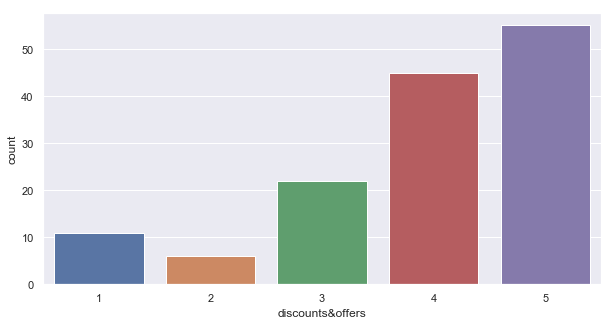

In [79]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('discounts&offers',data=data)

plt.show()



# Enjoyment is derived from shopping online

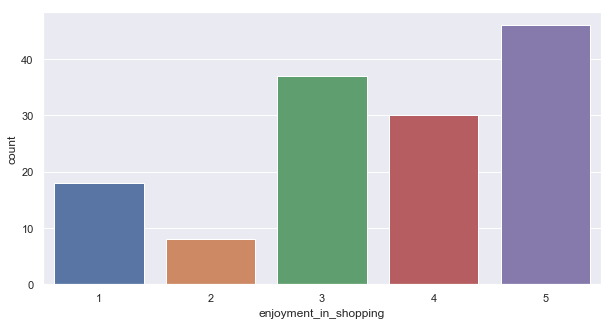

5    46
3    37
4    30
1    18
2     8
Name: enjoyment_in_shopping, dtype: int64

In [80]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('enjoyment_in_shopping',data=data)

plt.show()

data.enjoyment_in_shopping.value_counts()

# Shopping online is convenient and flexible

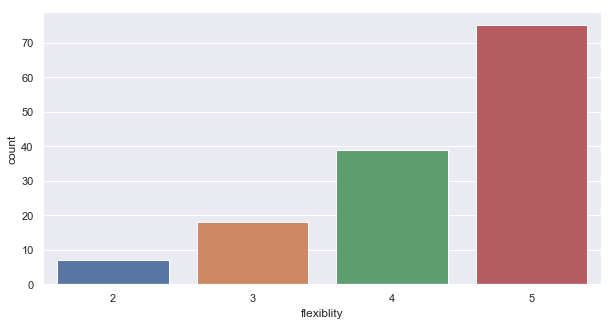

5    75
4    39
3    18
2     7
Name: flexiblity, dtype: int64

In [82]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('flexiblity',data=data)

plt.show()

data.flexiblity.value_counts()

# Return and replacement policy of the e-tailer is important for purchase decision

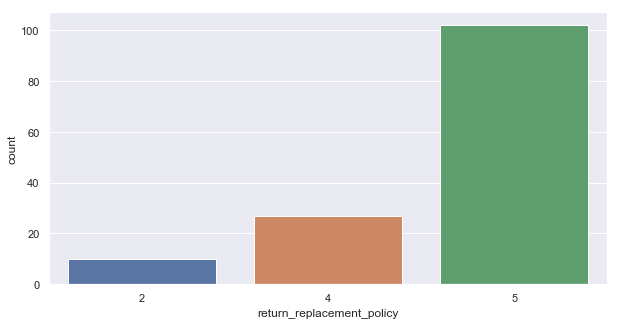

5    102
4     27
2     10
Name: return_replacement_policy, dtype: int64

In [84]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('return_replacement_policy',data=data)

plt.show()

data.return_replacement_policy.value_counts()

# Gaining access to loyalty programs is a benefit of shopping online

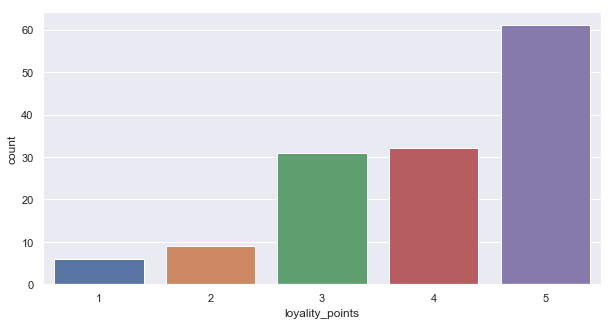

5    61
4    32
3    31
2     9
1     6
Name: loyality_points, dtype: int64

In [85]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('loyality_points',data=data)

plt.show()

data.loyality_points.value_counts()

# Displaying quality Information on the website improves satisfaction of customers

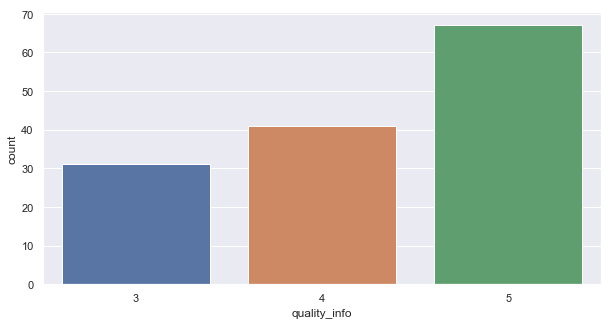

5    67
4    41
3    31
Name: quality_info, dtype: int64

In [86]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('quality_info',data=data)

plt.show()

data.quality_info.value_counts()

# User derive satisfaction while shopping on a good quality website or application

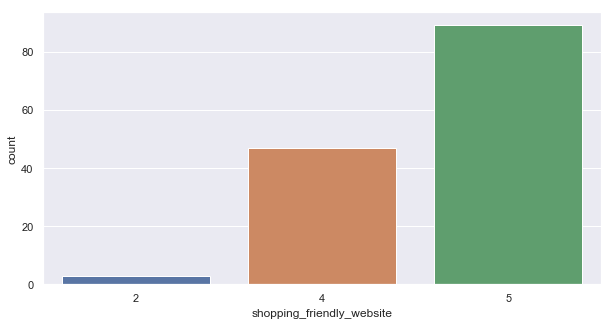

5    89
4    47
2     3
Name: shopping_friendly_website, dtype: int64

In [88]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('shopping_friendly_website',data=data)

plt.show()

data.shopping_friendly_website.value_counts()

# Net Benefit derived from shopping online can lead to users satisfaction

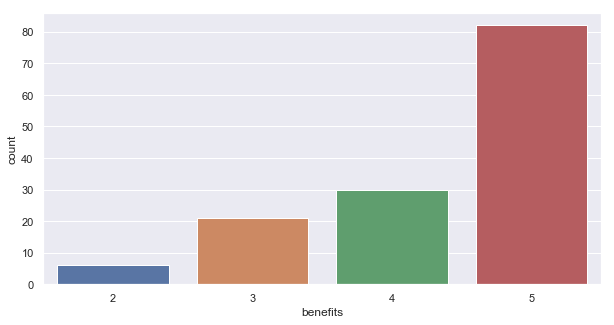

5    82
4    30
3    21
2     6
Name: benefits, dtype: int64

In [89]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('benefits',data=data)

plt.show()

data.benefits.value_counts()

# User satisfaction cannot exist without trust

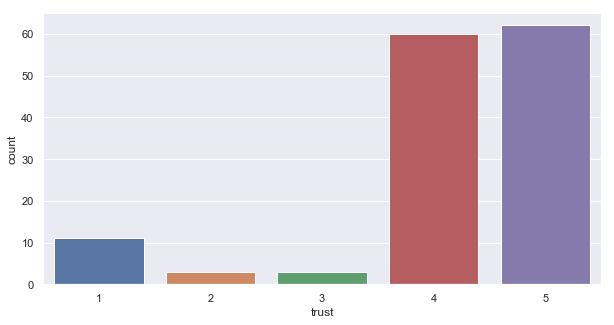

5    62
4    60
1    11
3     3
2     3
Name: trust, dtype: int64

In [90]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('trust',data=data)

plt.show()

data.trust.value_counts()

# Offering a wide variety of listed product in several category

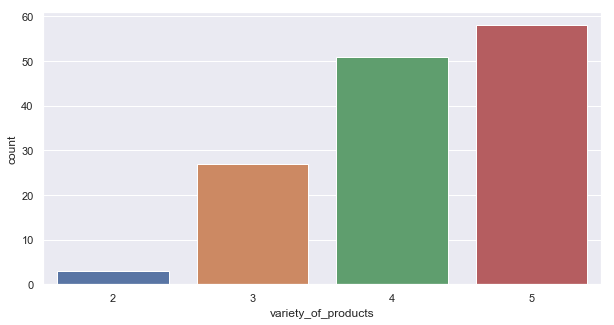

5    58
4    51
3    27
2     3
Name: variety_of_products, dtype: int64

In [91]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('variety_of_products',data=data)

plt.show()

data.variety_of_products.value_counts()

# Provision of complete and relevant product information

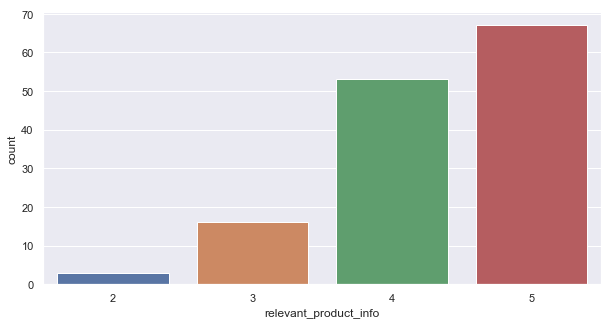

5    67
4    53
3    16
2     3
Name: relevant_product_info, dtype: int64

In [93]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('relevant_product_info',data=data)

plt.show()

data.relevant_product_info.value_counts()

# Monetary savings

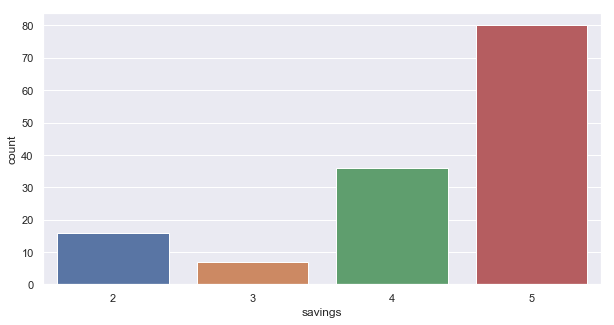

5    80
4    36
2    16
3     7
Name: savings, dtype: int64

In [94]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('savings',data=data)

plt.show()

data.savings.value_counts()

# The Convenience of patronizing the online retailer

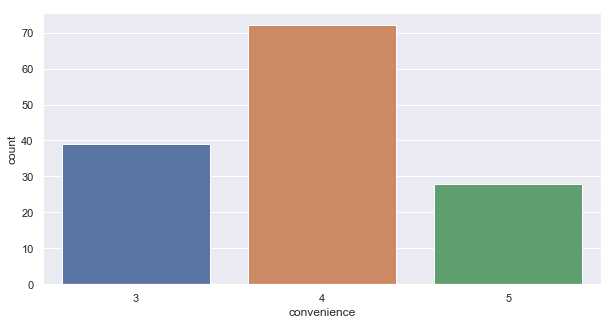

4    72
3    39
5    28
Name: convenience, dtype: int64

In [95]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('convenience',data=data)

plt.show()

data.convenience.value_counts()

# Shopping on the website gives you the sense of adventure

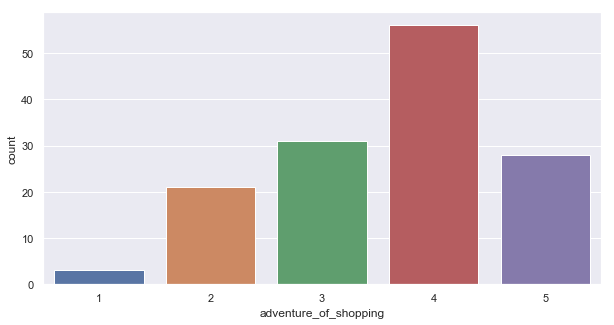

4    56
3    31
5    28
2    21
1     3
Name: adventure_of_shopping, dtype: int64

In [101]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('adventure_of_shopping',data=data)

plt.show()

data.adventure_of_shopping.value_counts()

# Shopping on your preferred e-tailer enhances your social status

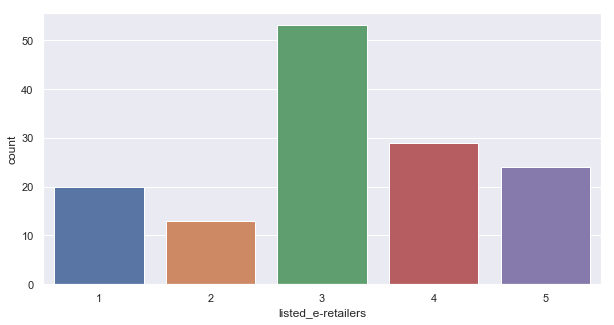

In [103]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('listed_e-retailers',data=data)

plt.show()



# You feel gratification shopping on your favorite e-tailer

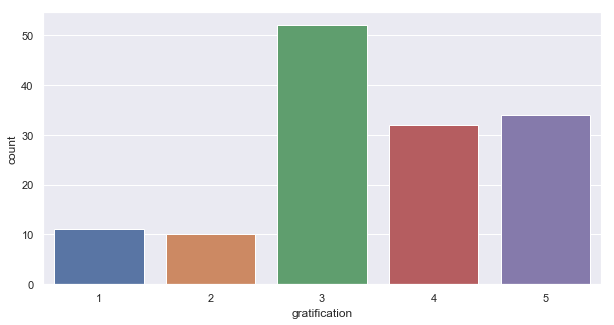

3    52
5    34
4    32
1    11
2    10
Name: gratification, dtype: int64

In [104]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('gratification',data=data)

plt.show()

data.gratification.value_counts()

# Shopping on the website helps you fulfill certain roles

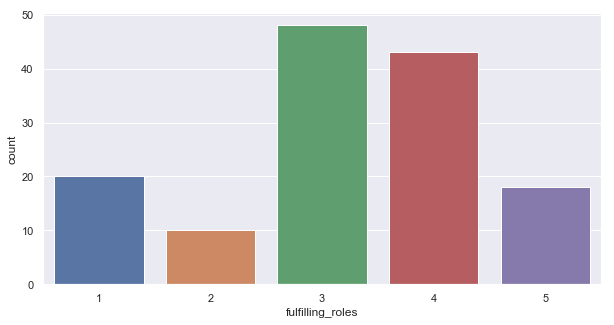

3    48
4    43
1    20
5    18
2    10
Name: fulfilling_roles, dtype: int64

In [105]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('fulfilling_roles',data=data)

plt.show()

data.fulfilling_roles.value_counts()

# Getting value for money spent

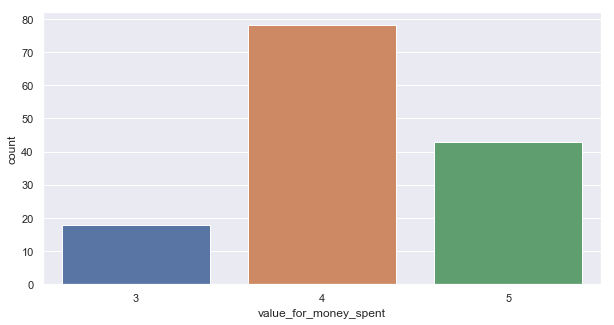

4    78
5    43
3    18
Name: value_for_money_spent, dtype: int64

In [106]:
sns.set()
plt.figure(figsize=(10,5))
sns.countplot('value_for_money_spent',data=data)

plt.show()

data.value_for_money_spent.value_counts()